In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
from sklearn.datasets import load_diabetes

In [15]:
dataset=load_diabetes()

In [16]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [17]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [18]:
df_diabetes=pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [19]:
X=df_diabetes
y=dataset['target']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [28]:
from sklearn.tree import DecisionTreeRegressor
treeclassifier=DecisionTreeRegressor()
treeclassifier.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


<Axes: >

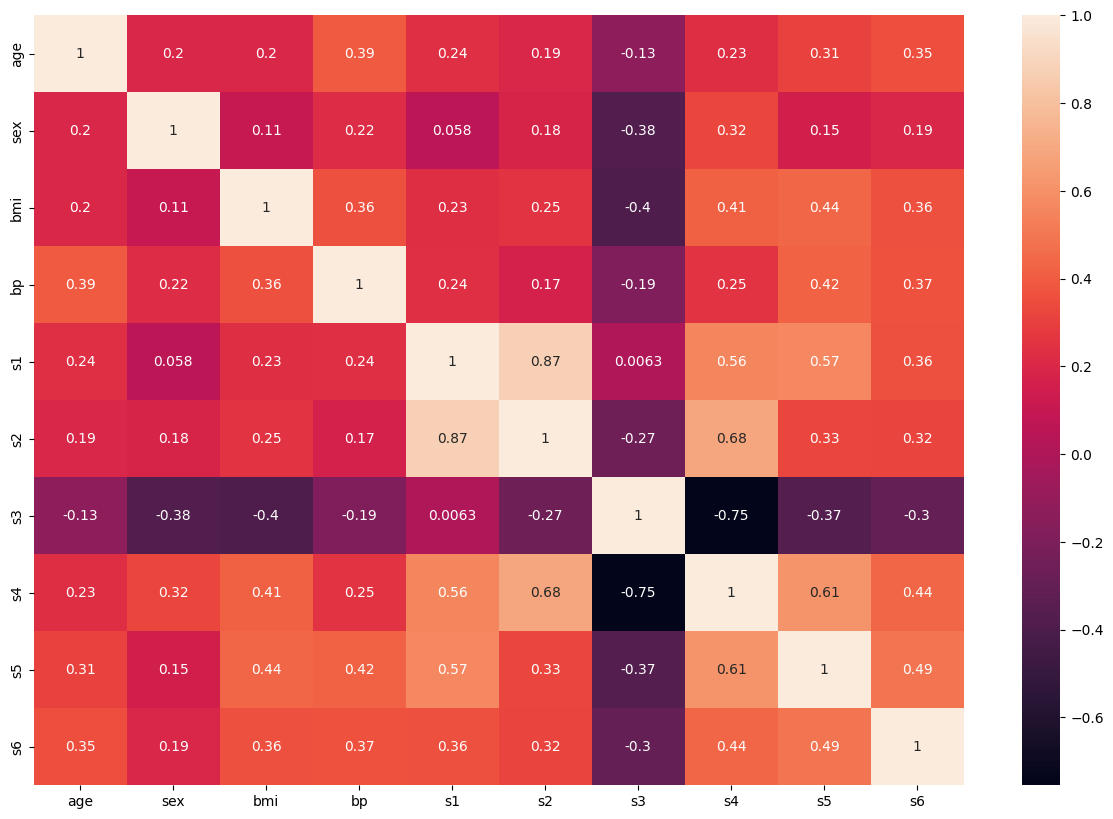

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [30]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
regressor=DecisionTreeRegressor()

In [33]:
grid=GridSearchCV(regressor,param_grid=param,scoring='neg_mean_squared_error')

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
grid.fit(X_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'absolute_error'


In [36]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [38]:
y_pred=grid.predict(X_test)

In [39]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
print(r2_score(y_pred,y_test))

-0.4650267686957079


In [41]:
selectmodel=DecisionTreeRegressor(criterion='friedman_mse',splitter='random',max_depth=4,max_features='log2')

[Text(0.4375, 0.9, 'x[9] <= -0.037\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.20833333333333334, 0.7, 'x[5] <= 0.092\nfriedman_mse = 3340.159\nsamples = 67\nvalue = 117.925'),
 Text(0.3229166666666667, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[3] <= -0.018\nfriedman_mse = 3347.44\nsamples = 66\nvalue = 117.121'),
 Text(0.08333333333333333, 0.3, 'x[8] <= -0.01\nfriedman_mse = 2314.754\nsamples = 44\nvalue = 107.136'),
 Text(0.041666666666666664, 0.1, 'friedman_mse = 1715.465\nsamples = 36\nvalue = 97.75'),
 Text(0.125, 0.1, 'friedman_mse = 2830.984\nsamples = 8\nvalue = 149.375'),
 Text(0.25, 0.3, 'x[8] <= -0.026\nfriedman_mse = 4814.628\nsamples = 22\nvalue = 137.091'),
 Text(0.20833333333333334, 0.1, 'friedman_mse = 964.04\nsamples = 10\nvalue = 91.4'),
 Text(0.2916666666666667, 0.1, 'friedman_mse = 4833.972\nsamples = 12\nvalue = 175.167'),
 Text(0.25, 0.5, 'friedman_mse = 0.0\nsamples = 1\nvalue = 171.0'),
 Text(0.6666666666666666, 0.7, 'x[7] <= 0.0

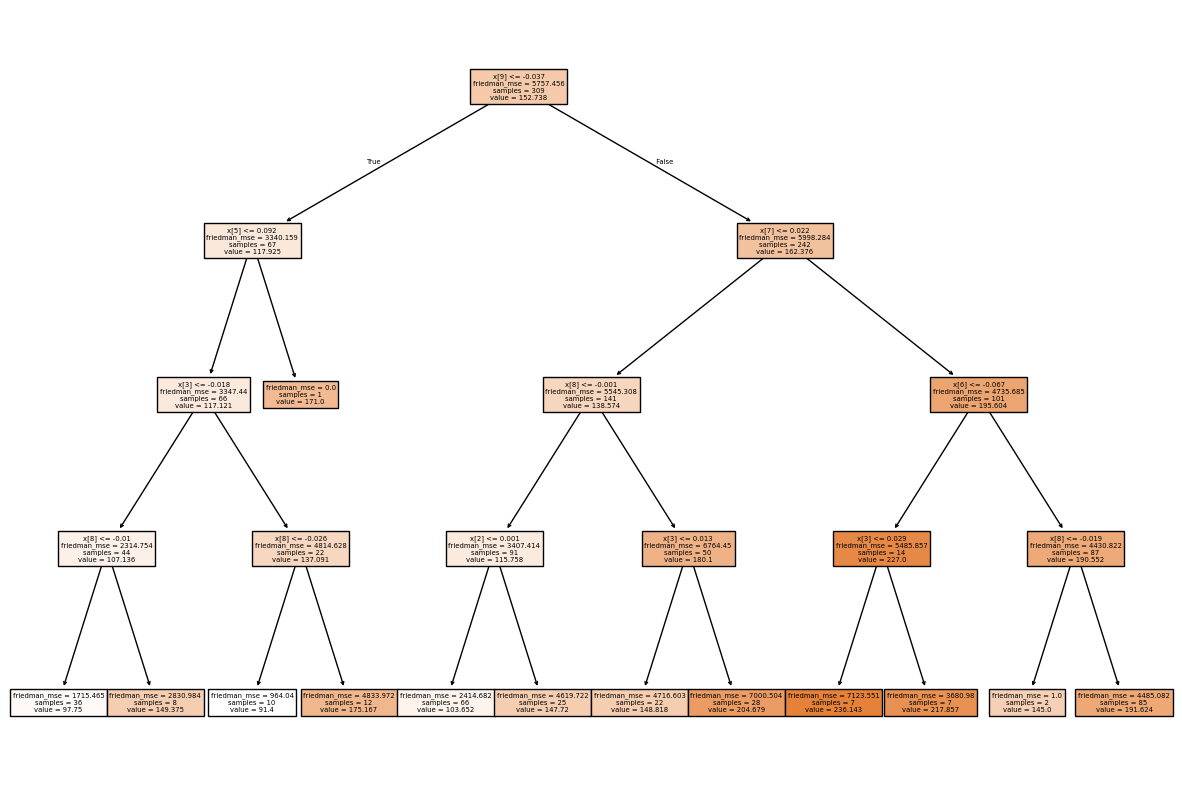

In [44]:
from sklearn import tree
selectmodel.fit(X_train,y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,filled=True)